In [1]:
import numpy as np
import torch
import time

In [3]:
N = 2000
A = np.random.normal(size=(3000,N))
B = np.random.normal(size=(N,4000))

t0 = time.time()
C = A @ B
t1 = time.time()
t1 - t0

1.4875855445861816

In [4]:
type(A)

numpy.ndarray

In [7]:
A = torch.from_numpy(A)
B = torch.from_numpy(B)

In [8]:
type(A)

torch.Tensor

In [9]:
t0 = time.time()
C = A @ B
t1 = time.time()
t1 - t0

1.707587480545044

In [15]:
torch.cuda.is_available()

False

In [16]:
if torch.cuda.is_available():
    A = A.to('cuda')
    B = B.to('cuda')

In [17]:
A.device

device(type='cpu')

In [18]:
C.shape

torch.Size([3000, 4000])

In [19]:
C[:10,:10]

tensor([[  54.6592,  -16.8731,    3.4722,   28.8063,   -3.0670,   34.9675,
          -48.7010,  -31.0275, -107.6674,  -26.6233],
        [  17.7543,   13.7357,  -10.5189,   17.3631,  109.5332,   11.9755,
           19.7469,   99.7438,   38.0426,  -16.7943],
        [ -23.1788,  -75.7157,  -47.9798,  124.4628,   73.9141,   56.5853,
           13.4725,  -29.6063,   99.0322,   56.0131],
        [ -55.1060,   34.7381,   13.6896,  -38.5162,   41.0719,   -1.9469,
          -42.3964,  -30.9306,  -82.1089,   24.0133],
        [ -24.8305,    8.5998,   82.9368,  -18.1632,  -40.5717,  -97.5992,
           59.6347,  -16.3056,  -17.2164,  -26.8291],
        [ -45.4433,  -21.8354,  -84.5745,  -53.3216,  -21.8927,   33.1250,
           20.1117,  -47.1611,   33.2721,  -32.8139],
        [  73.5653,   44.6778,   -1.6142,   -0.3725,   25.2244,   77.6464,
          -66.6611,  -36.3923,  -20.4338,  -79.6444],
        [  45.5672,  -14.9102,  -28.8154,   33.5174,   34.3289,  -24.7451,
          -18.2546,  -

In [20]:
a = torch.tensor([1,2,3])
a.sum()

tensor(6)

In [21]:
a.sum().item()

6

In [22]:
a.reshape(-1,1)

tensor([[1],
        [2],
        [3]])

In [23]:
b = torch.tensor([-1, 0.5, 4])
a * b

tensor([-1.,  1., 12.])

In [30]:
from torch import tensor
from matplotlib import pyplot as plt

In [31]:
def f(x):
    y = x ** 2
    return y

def df(x):
    gradient = 2 * x
    return gradient

In [32]:
def plot_func(func, color="red"):
    x_vals = np.arange(-3, 3, 0.1)
    y_vals = func(x_vals)
    plt.plot(x_vals, y_vals, color)

def plot_gradient(x, y, slope):
    x, y, slope = map(float, (x, y, slope))
    dx = 3
    dy = dx*slope
    plt.arrow(x-dx/2, y-dy/2, dx, dy, linewidth=2)

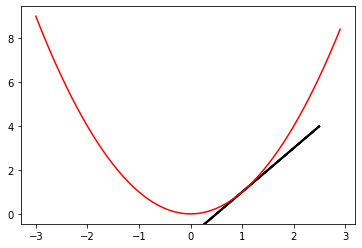

In [37]:
x = 1
y = f(x)
gradient = df(x)

plot_func(f)
plot_gradient(x=x, y=y, slope = gradient)

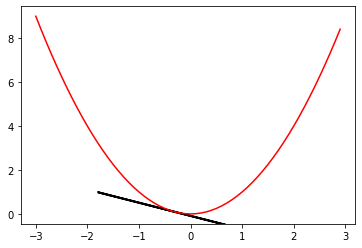

In [44]:
x = tensor(-.3).requires_grad_()
y = f(x)
y.backward()
#don't have df
gradient = x.grad
plot_func(f)
plot_gradient(x=x, y=y, slope = gradient)

tensor(-0.6000)


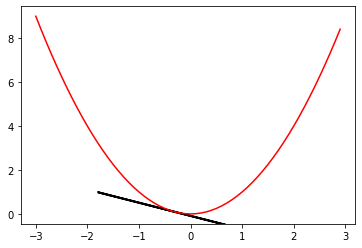

In [57]:
y = f(x)
x.grad.zero_()
y.backward()
gradient = x.grad
print(x.grad)
plot_func(f)
plot_gradient(x=x, y=y, slope = gradient)

In [66]:
def f1(x):
    y = 3 - x + (x/2)**2
    return y
    
def f2(x):
    y = 3 - (x/2) ** 2
    return y

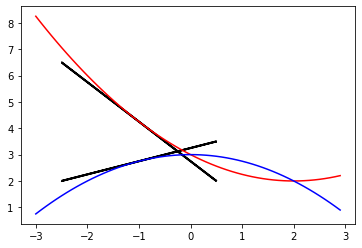

In [80]:
plot_func(f1)
plot_func(f2, "blue")

x = tensor(-1.0).requires_grad_()
y1 = f1(x)
y2 = f2(x)

y1.backward()
f1_grad = x.grad
plot_gradient(x, y1, f1_grad)

x.grad.zero_()

y2.backward()
f2_grad = x.grad
plot_gradient(x, y2, f2_grad)